In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp

In [2]:
# Create a binary classification dataset with 2 features
data, labels = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1, random_state=42)


In [3]:
# let's assume you have data and labels
# data = ...
# labels = ...

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
# Initialize and fit the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
# Make predictions on the test set
predictions = logreg.predict(X_test)

In [6]:
# Print confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[97  7]
 [13 83]]


In [7]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

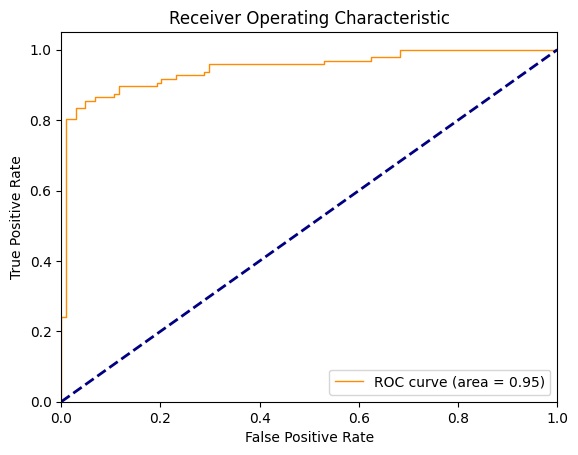

In [8]:
# Plot ROC curve (Receiver Operating Characteristic)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Cumulative Gain Curve
sorted_proba = np.sort(logreg.predict_proba(X_test)[:, 1])[::-1]
percentage_of_total = np.linspace(0, 1, len(sorted_proba))
cumulative_gain = np.cumsum(sorted_proba) / np.sum(sorted_proba)

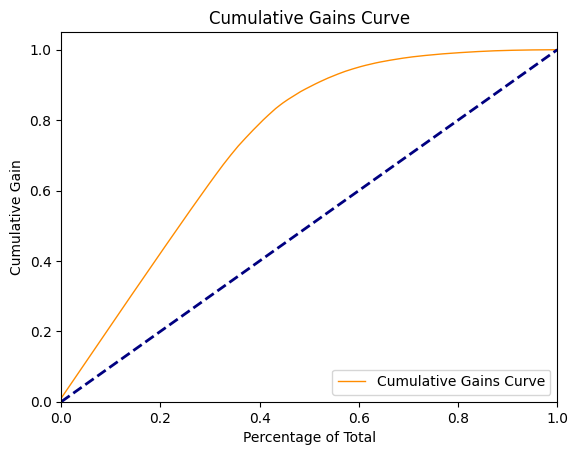

In [10]:
plt.figure()
plt.plot(percentage_of_total, cumulative_gain, color='darkorange', lw=1, label='Cumulative Gains Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Percentage of Total')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gains Curve')
plt.legend(loc="lower right")
plt.show()